In [1]:
import yaml
from inspect import getsourcefile
import os.path
import os
os.system('module load gurobipy3')

import sys
import matplotlib

import matplotlib.pyplot as plt
import argparse

import seaborn as sns
# import gurobipy
current_path = os.path.abspath(getsourcefile(lambda:0))
current_dir = os.path.dirname(current_path)
parent_dir = os.path.dirname(current_dir)
parent_parent_dir = os.path.dirname(parent_dir)
sys.path.insert(0, parent_parent_dir+"/heuristics")

print(parent_parent_dir+"/heuristics")

# parent_dir = current_dir[:current_dir.rfind(os.path.sep)]
sys.path.insert(0, parent_parent_dir)


from group import SEIR_group, DynamicalModel
import math
import pprint
import pandas as pd
import pickle
import numpy as np
from copy import deepcopy



/usr/local/ifs/projects/daniancu-covid-targets/covid-optimization/heuristics


linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient
['xi-371990.3', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.2', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient
['xi-5579854.5', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.2', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient
['xi-1859951.5', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.2', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient
['xi-929975.75', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'sta

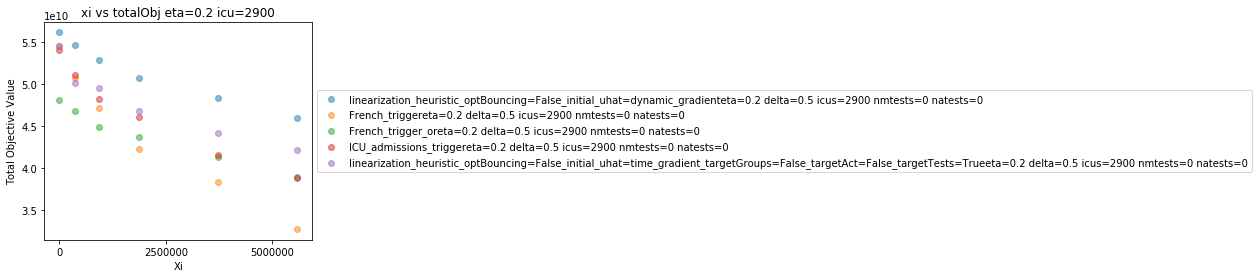

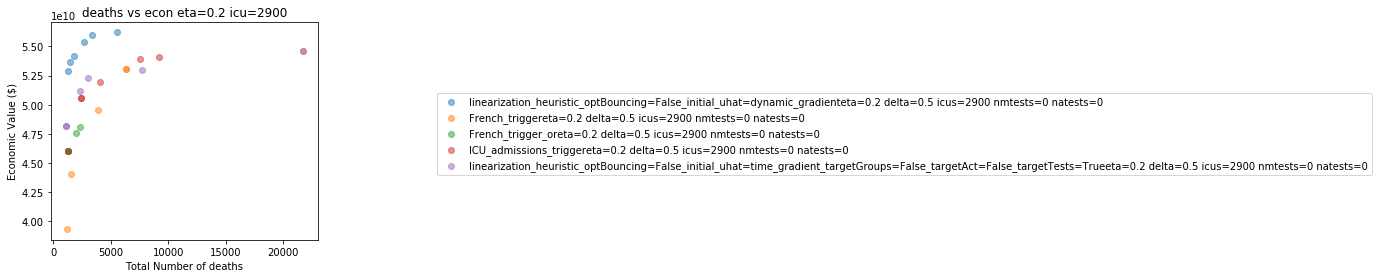

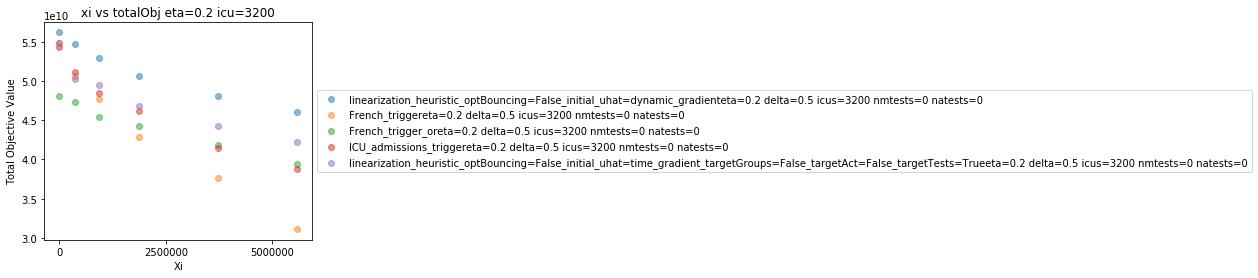

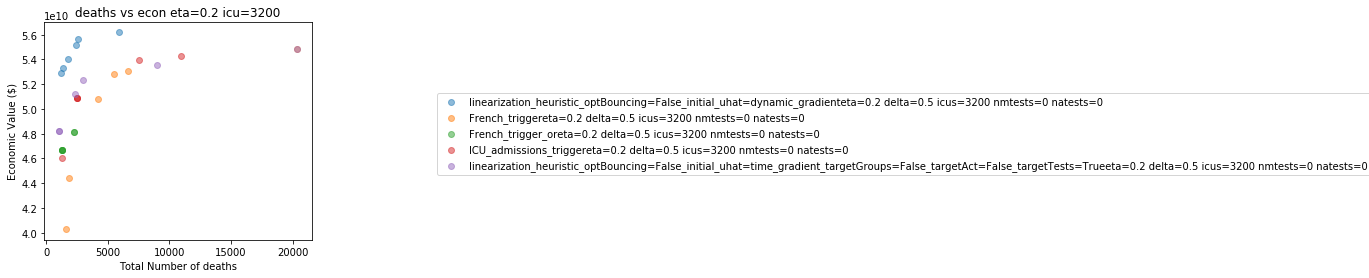

In [4]:
icus_to_try = [2900,3200]
# ,2900,3200]
etas_to_try = [0.2]
# ,0.1,0.2]

for et in etas_to_try:
    for ic in icus_to_try:

        etas = [et]
        deltas = [0.5]
        icus = [ic]
        lockdown_freq=14
        testing_freq=7
        nmtests = [0]
        natests = [0]

        heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient", "French_trigger","French_trigger_or","ICU_admissions_trigger","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"]
        # ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "full_lockdown", "full_open"]
        # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
        # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
        # ,"dynamic_gradient"]
        #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
        #  ["dynamic_gradient"]
        # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
        # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
        # ["dynamic_gradient"]
        # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

        # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

        fig1, ax1 = plt.subplots(1)
        box = ax1.get_position()
        ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        # Put a legend to the right of the current axis



        fig2, ax2 = plt.subplots(1)
        box = ax2.get_position()
        ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])





        for h in heurs:
            for e in etas:
                for d in deltas:
                    for i in icus:
                        for nm in nmtests:
                            for na in natests:
                                all_deaths = []
                                all_econ_values = []
                                all_xis = []
                                all_rewards = []
                                symbols = ["*",".","d","o","s","^"]
                                
                                for file_name in os.listdir(h):
                                    instance = file_name.split("_")

                                    for p in instance:
                                        if "xi" in p:
                                            xi = float(p.split("-")[1])
                            #                 print(xi)
                                        if "icus" in p:
                                            icu = float(p.split("-")[1])
                            #                 print(icu)
                                        if "natests" in p:
                                            natest = float(p.split("-")[1])
                            #                 print(natest)
                                        if "nmtests" in p:
                                            nmtest = float(p.split("-")[1])
                            #                 print(nmtest)
                                        if "dschool" in p:
                                            delta = float(p.split("-")[1])
                            #                 print(delta)
                                        if "eta" in p:
                                            eta = float(p.split("-")[1])
                            #                 print(eta)
                                    if eta == e and icu == i and nmtest == nm and natest == na and delta == d:
                                        print(h)
                                        print(instance)
                                        
                                        with open("%s/%s"%(h,file_name)) as file:
                                            result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                        # Read group parameters
                                        with open("../../parameters/fitted.yaml") as file:
                                            universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read econ parameters
                                        with open("../../parameters/econ.yaml") as file:
                                            econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read group parameters
                                        with open("../../parameters/one_group_fitted.yaml") as file:
                                            universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read econ parameters
                                        with open("../../parameters/one_group_econ.yaml") as file:
                                            econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                        start_day = result["experiment_params"]["start_day"]

                                        if result["groups"] == "one":
                                            universe_params = universe_params_one
                                            econ_params = econ_params_one

                                            with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                initialization = yaml.load(file, Loader=yaml.FullLoader)

                                        elif result["groups"] == "all":
                                            universe_params = universe_params_all
                                            econ_params = econ_params_all

                                            with open("../../initialization/oct21.yaml") as file:
                                                initialization = yaml.load(file, Loader=yaml.FullLoader)
                                        else:
                                            assert(False)

                                        experiment_params = result["experiment_params"]

                                        dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                        for t in range(experiment_params["T"]):
                                            dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                        dynModel.take_end_steps()

                                        deaths = dynModel.get_total_deaths()
                                        econ_value = dynModel.get_total_reward() + dynModel.get_total_deaths() * xi 
                                        reward = dynModel.get_total_reward()
                                        
                                        all_deaths.append(deaths)
                                        all_econ_values.append(econ_value)
                                        all_xis.append(xi)
                                        all_rewards.append(reward)
                                    
                                print(all_rewards)
                                print(all_xis)
                                ax1.scatter(all_xis, all_rewards, label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5)

                                ax2.scatter(all_deaths, all_econ_values,label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5)
                                print(all_econ_values)
                                print(all_deaths)
                    

        # for x,y in zip(all_deaths, all_econ_values):

        #     label = "{:.2f}".format(all_xis[all_deaths.index(x)])

            # ax2.annotate(label, # this is the text
            #                     (x,y), # this is the point to label
            #                     textcoords="offset points", # how to position the text
            #                     xytext=(0,10), # distance from text to points (x,y)
            #                     ha='center') # horizontal alignment can be left, right or center

        ax1.set(ylabel='Total Objective Value')
        ax1.set(xlabel='Xi')
        ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

        # Put a legend to the right of the current axis
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        ax1.set_title(f"xi vs totalObj eta={etas[0]} icu={icus[0]}")
        fig1.savefig(f"plots/simple_xi_vs_totalObj_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')



        ax2.set(ylabel='Economic Value ($)')
        ax2.set(xlabel='Total Number of deaths')


        fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        ax2.set_title(f"deaths vs econ eta={etas[0]} icu={icus[0]}")
        fig2.savefig(f"plots/simple_deaths_vs_econValue_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')
                    
        # for eta in etas:
        #     for delta in deltas:
        #         for icu in icus:
        #             for nmtest in nmtests:
        #                 for natest in natests:
        #                     for heur in heurs:
                                
                            





, 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True
['xi-371990.3', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True
['xi-1859951.5', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
[42641168573.981575, 55563628660.793755, 45747929561.844795, 50377494580.015465, 53190924093.16546, 48582042436.70955]
[5579854.5, 0.0, 3719903.0, 929975.75, 371990.3, 1859951.5]
[48426005931.98749, 55563628660.793755, 51228446493.547714, 52404407008.1486, 55260291018.531876, 51461601047.5929]
[1

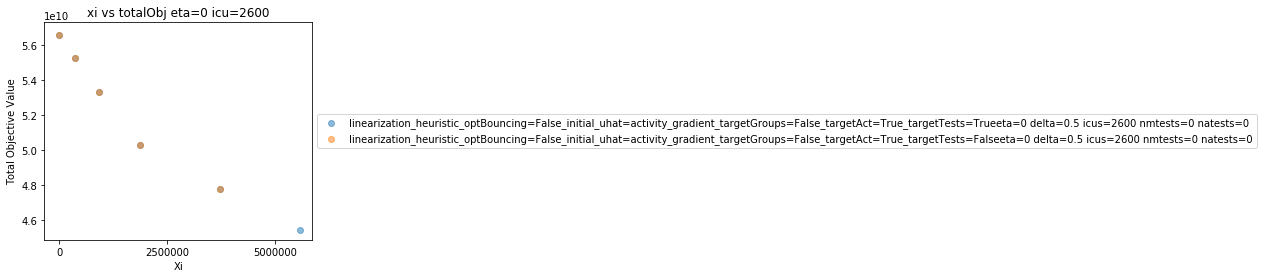

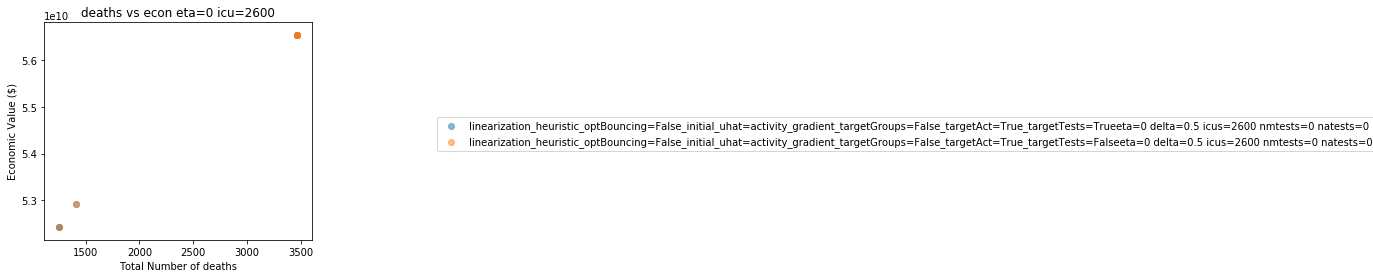

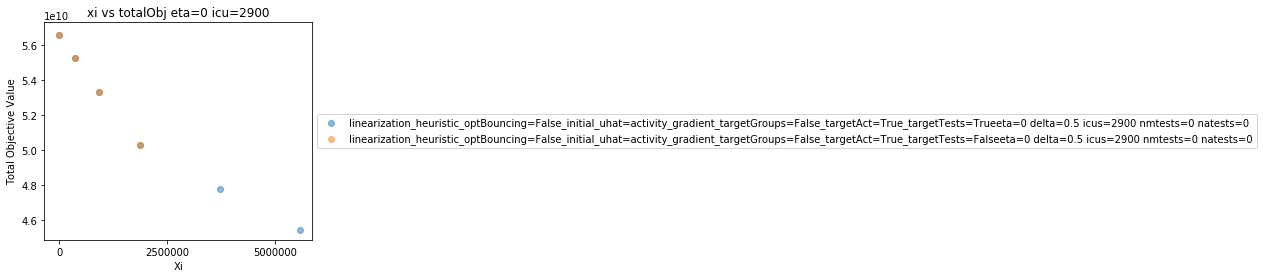

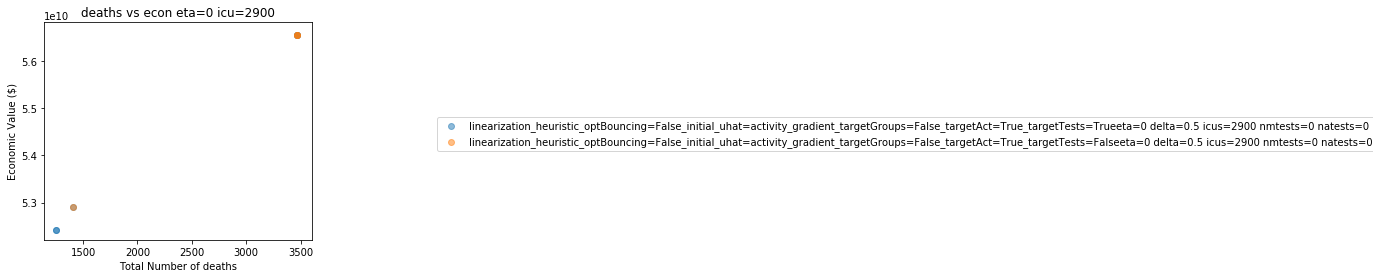

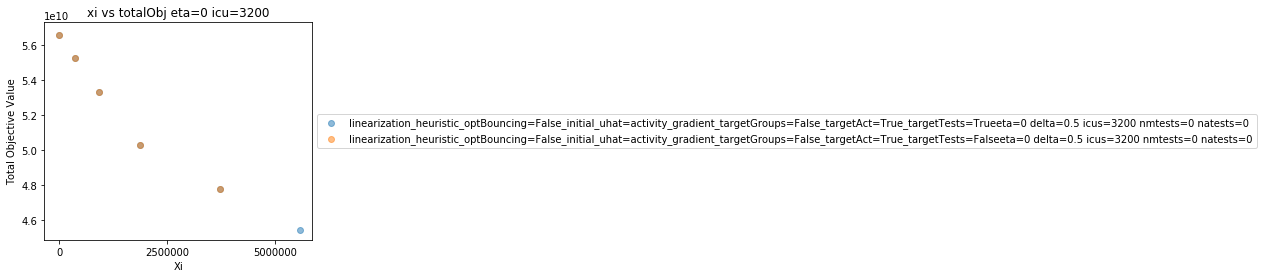

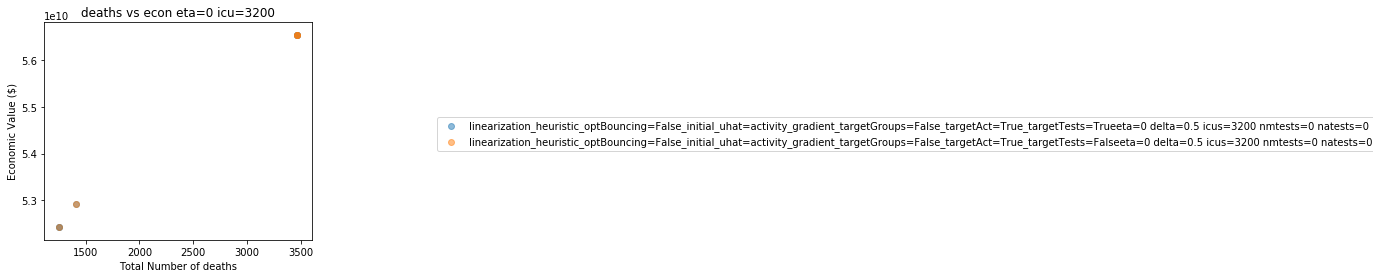

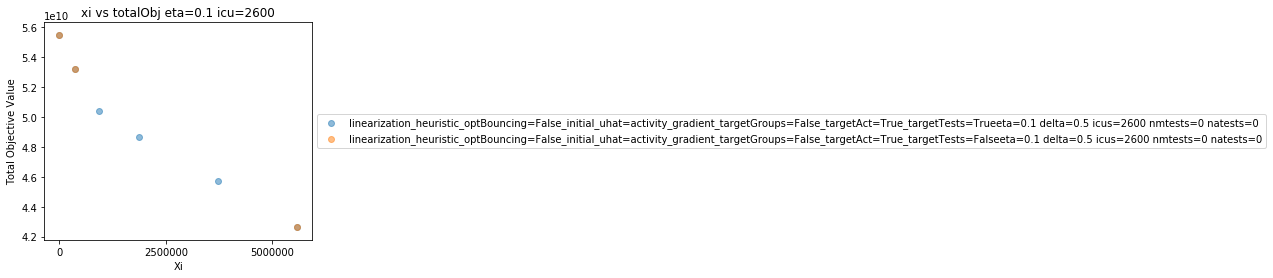

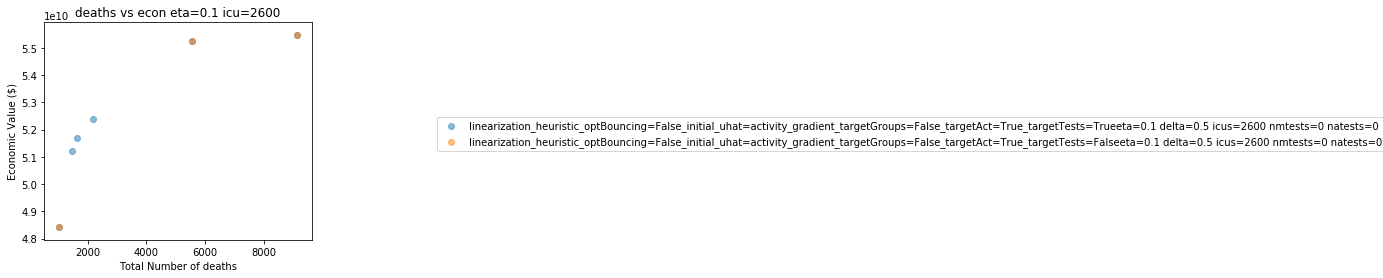

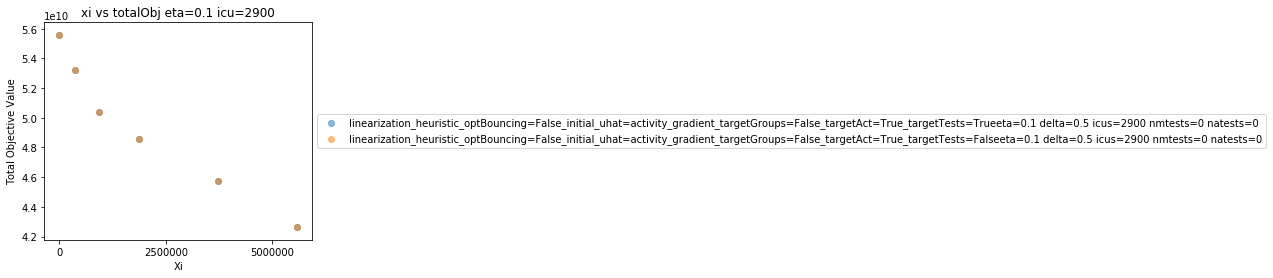

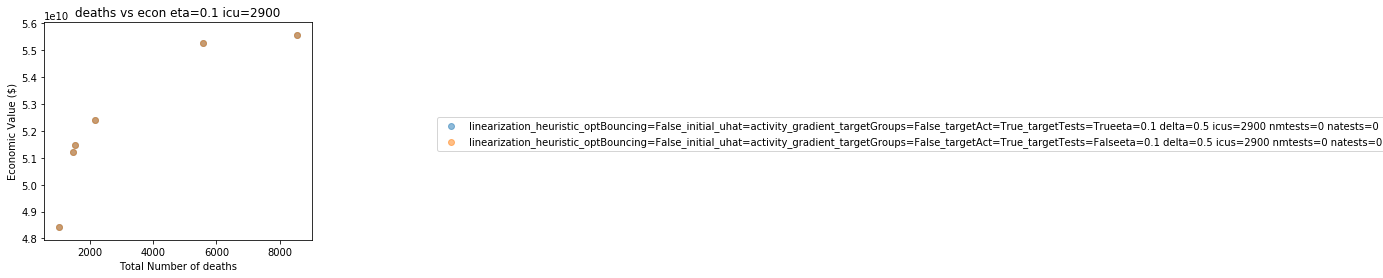

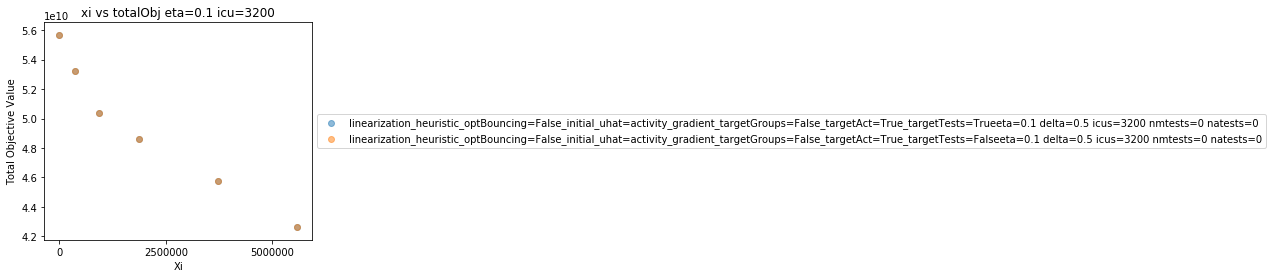

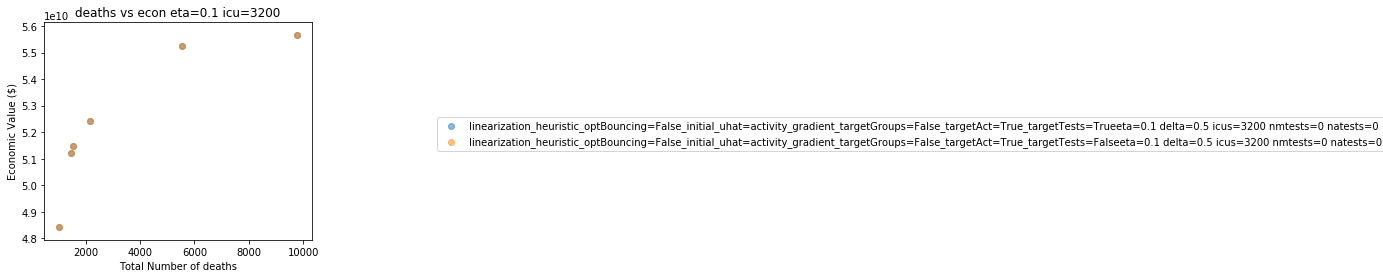

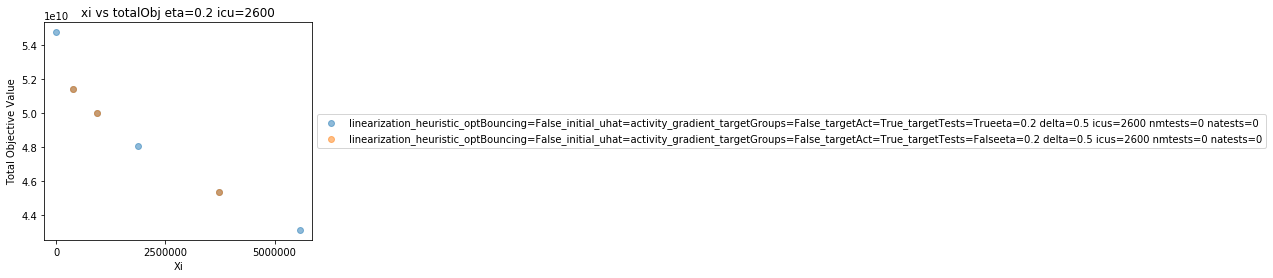

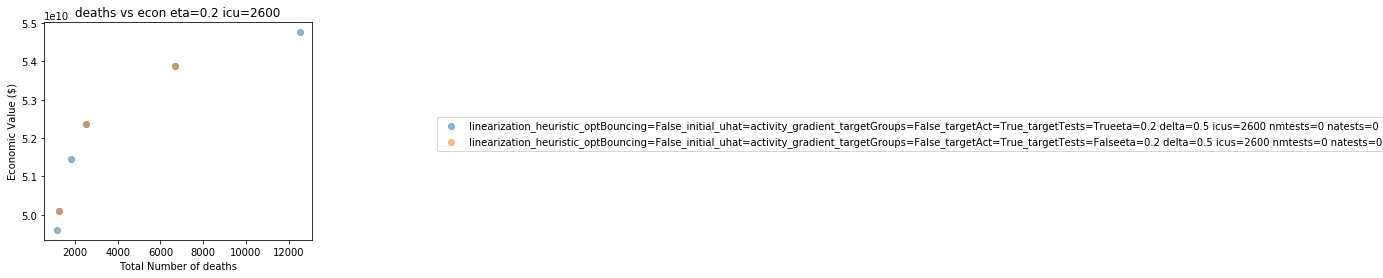

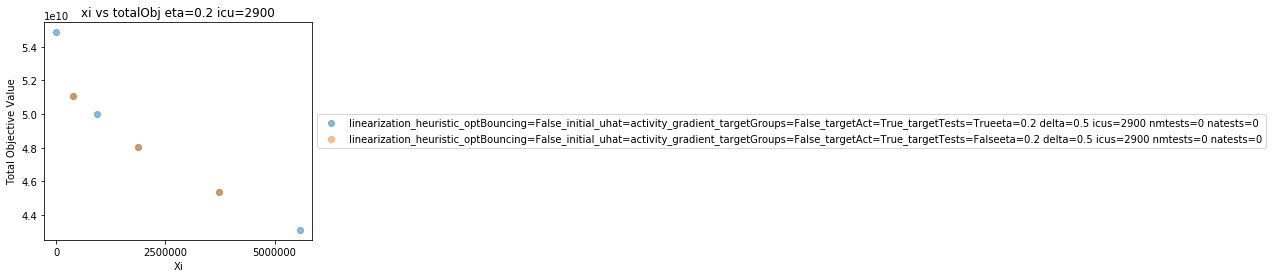

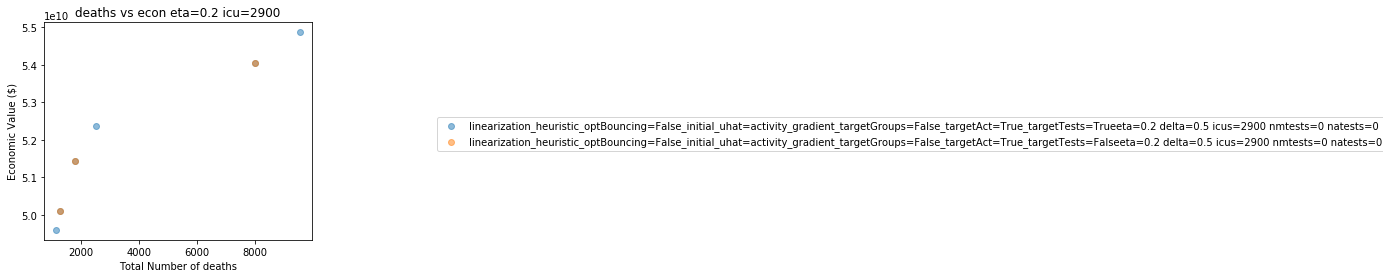

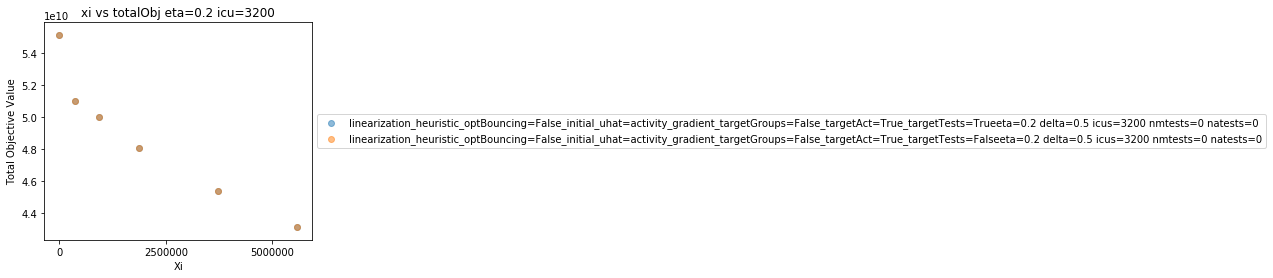

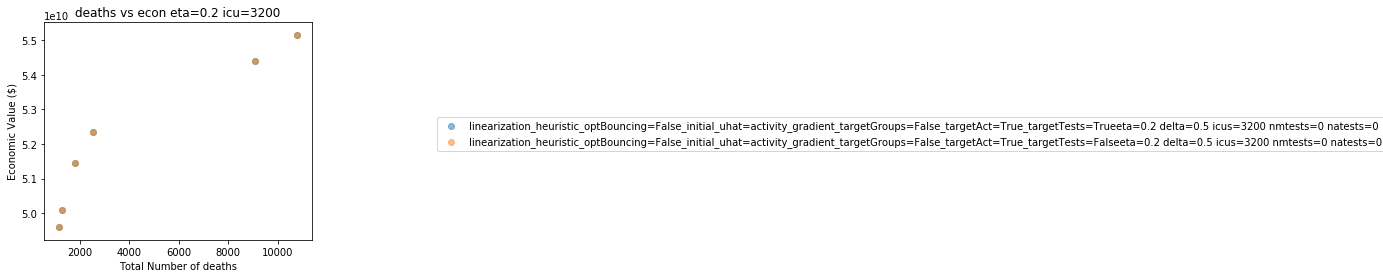

In [3]:
icus_to_try = [2600,2900,3200]
etas_to_try = [0,0.1,0.2]
nmtest_to_try = [0]

for et in etas_to_try:
    for ic in icus_to_try:
        for n_test in nmtest_to_try:

            etas = [et]
            deltas = [0.5]
            icus = [ic]
            lockdown_freq=14
            testing_freq=7
            nmtests = [n_test]
            natests = [0]

            heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True","linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=False"]
            
            #  "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"]
            # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
            # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
            # ,"dynamic_gradient"]
            #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
            #  ["dynamic_gradient"]
            # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
            # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
            # ["dynamic_gradient"]
            # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

            # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

            fig1, ax1 = plt.subplots(1)
            box = ax1.get_position()
            ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

            # Put a legend to the right of the current axis



            fig2, ax2 = plt.subplots(1)
            box = ax2.get_position()
            ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])





            for h in heurs:
                for e in etas:
                    for d in deltas:
                        for i in icus:
                            for nm in nmtests:
                                for na in natests:
                                    all_deaths = []
                                    all_econ_values = []
                                    all_xis = []
                                    all_rewards = []
                                    symbols = ["*",".","d","o","s","^"]
                                    
                                    for file_name in os.listdir(h):
                                        instance = file_name.split("_")

                                        for p in instance:
                                            if "xi" in p:
                                                xi = float(p.split("-")[1])
                                #                 print(xi)
                                            if "icus" in p:
                                                icu = float(p.split("-")[1])
                                #                 print(icu)
                                            if "natests" in p:
                                                natest = float(p.split("-")[1])
                                #                 print(natest)
                                            if "nmtests" in p:
                                                nmtest = float(p.split("-")[1])
                                #                 print(nmtest)
                                            if "dschool" in p:
                                                delta = float(p.split("-")[1])
                                #                 print(delta)
                                            if "eta" in p:
                                                eta = float(p.split("-")[1])
                                #                 print(eta)
                                        if eta == e and icu == i and nmtest == nm and natest == na and delta == d:
                                            print(h)
                                            print(instance)
                                            
                                            with open("%s/%s"%(h,file_name)) as file:
                                                result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                            # Read group parameters
                                            with open("../../parameters/fitted.yaml") as file:
                                                universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                            # Read econ parameters
                                            with open("../../parameters/econ.yaml") as file:
                                                econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                            # Read group parameters
                                            with open("../../parameters/one_group_fitted.yaml") as file:
                                                universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                            # Read econ parameters
                                            with open("../../parameters/one_group_econ.yaml") as file:
                                                econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                            start_day = result["experiment_params"]["start_day"]

                                            if result["groups"] == "one":
                                                universe_params = universe_params_one
                                                econ_params = econ_params_one

                                                with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                    initialization = yaml.load(file, Loader=yaml.FullLoader)

                                            elif result["groups"] == "all":
                                                universe_params = universe_params_all
                                                econ_params = econ_params_all

                                                with open("../../initialization/oct21.yaml") as file:
                                                    initialization = yaml.load(file, Loader=yaml.FullLoader)
                                            else:
                                                assert(False)

                                            experiment_params = result["experiment_params"]

                                            dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                            for t in range(experiment_params["T"]):
                                                dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                            dynModel.take_end_steps()

                                            deaths = dynModel.get_total_deaths()
                                            econ_value = dynModel.get_total_reward() + dynModel.get_total_deaths() * xi 
                                            reward = dynModel.get_total_reward()
                                            
                                            all_deaths.append(deaths)
                                            all_econ_values.append(econ_value)
                                            all_xis.append(xi)
                                            all_rewards.append(reward)
                                        
                                    print(all_rewards)
                                    print(all_xis)
                                    ax1.scatter(all_xis, all_rewards, label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5)

                                    ax2.scatter(all_deaths, all_econ_values,label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5)
                                    print(all_econ_values)
                                    print(all_deaths)
                        

            # for x,y in zip(all_deaths, all_econ_values):

            #     label = "{:.2f}".format(all_xis[all_deaths.index(x)])

                # ax2.annotate(label, # this is the text
                #                     (x,y), # this is the point to label
                #                     textcoords="offset points", # how to position the text
                #                     xytext=(0,10), # distance from text to points (x,y)
                #                     ha='center') # horizontal alignment can be left, right or center

            ax1.set(ylabel='Total Objective Value')
            ax1.set(xlabel='Xi')
            ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

            # Put a legend to the right of the current axis
            ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

            ax1.set_title(f"xi vs totalObj eta={etas[0]} icu={icus[0]}")
            fig1.savefig(f"plots/test_value_xi_vs_totalObj_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')



            ax2.set(ylabel='Economic Value ($)')
            ax2.set(xlabel='Total Number of deaths')


            fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

            ax2.set_title(f"deaths vs econ eta={etas[0]} icu={icus[0]}")
            fig2.savefig(f"plots/test_value_deaths_vs_econValue_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')
                        
            # for eta in etas:
            #     for delta in deltas:
            #         for icu in icus:
            #             for nmtest in nmtests:
            #                 for natest in natests:
            #                     for heur in heurs:
                                    
                                


French_trigger
['xi-5579854', 'icus-3200', 'testing-homogeneous', 'natests-0', 'nmtests-0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.500000', 'eta-0.200000', 'freq-90-1.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient
['xi-5579854.5', 'icus-3200.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.2', 'lockdownFreq-14', 'testingFreq-7.yaml']
ICU_admissions_trigger
['xi-5579854', 'icus-3200', 'testing-homogeneous', 'natests-0', 'nmtests-0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.500000', 'eta-0.200000', 'freq-90-1.yaml']
French_trigger_or
['xi-5579854', 'icus-3200', 'testing-homogeneous', 'natests-0', 'nmtests-0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.500000', 'eta-0.200000', 'freq-90-1.yaml']


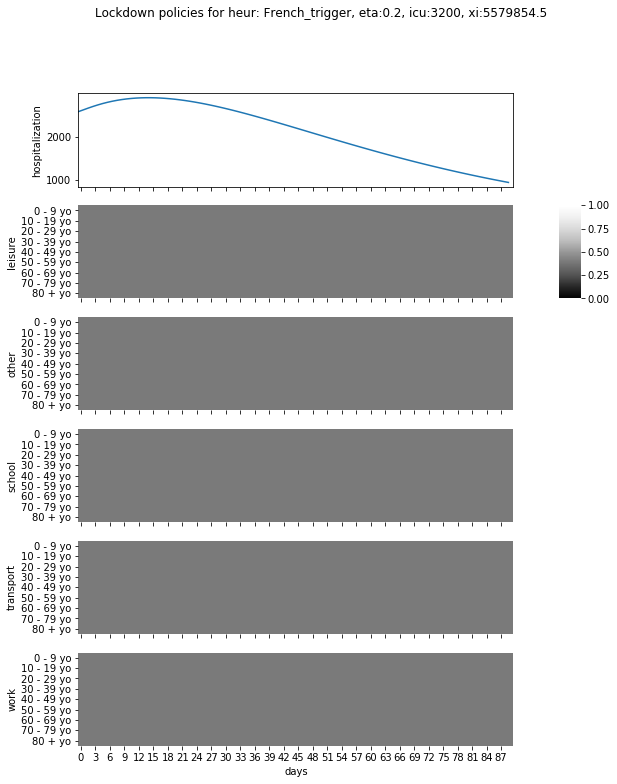

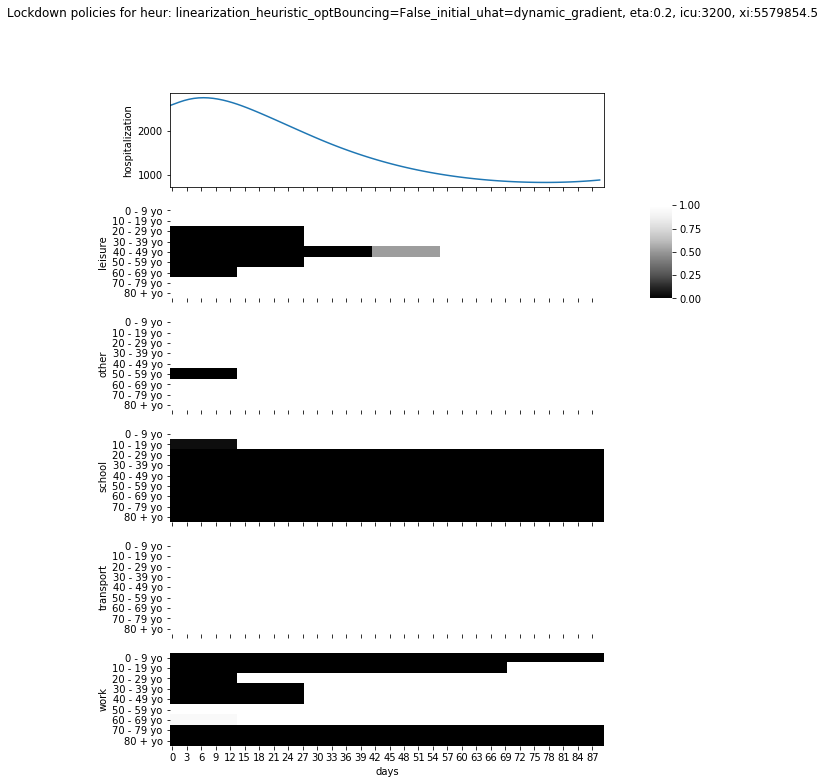

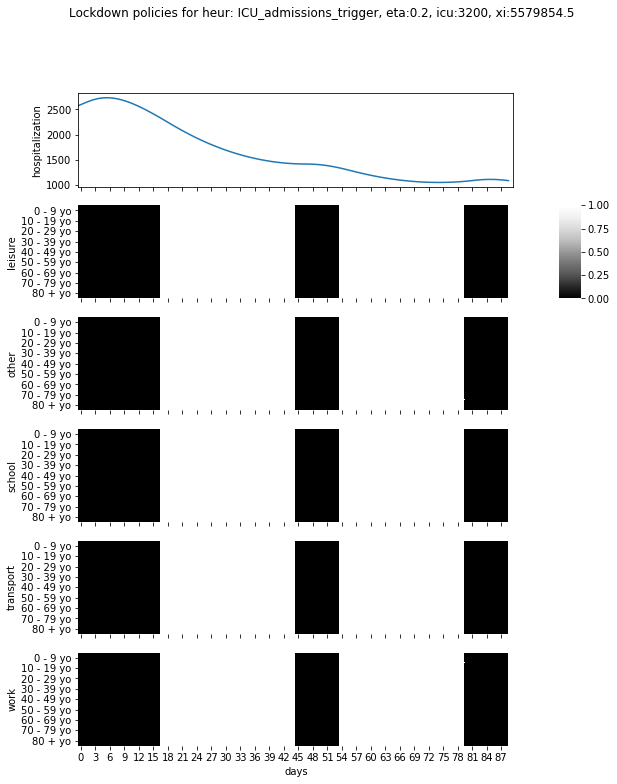

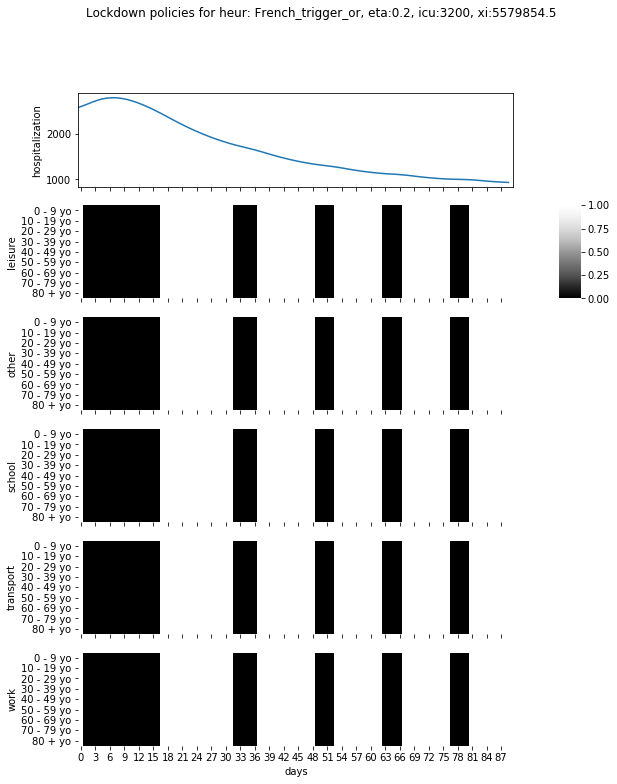

In [15]:
icus_to_try = [2600,2900,3200]
# ,2900,3200]
etas_to_try = [0,0.1,0.2]
# ,0.1,0.2]

xi_mult_values = [0,10,25,50,100,150]
# 0,10,25,50,100,150
xi_to_try = [mult * 37199.03  for mult in xi_mult_values]

for et in etas_to_try:
    for ic in icus_to_try:
        for x in xi_to_try:

            etas = [et]
            deltas = [0.5]
            icus = [ic]
            lockdown_freq=14
            testing_freq=7
            nmtests = [0]
            natests = [0]
            xis = [x]

            heurs = ["French_trigger","linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient", "ICU_admissions_trigger","French_trigger_or"]
            # "linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"]
            # ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "full_lockdown", "full_open"]
            # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
            # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
            # ,"dynamic_gradient"]
            #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
            #  ["dynamic_gradient"]
            # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
            # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
            # ["dynamic_gradient"]
            # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

            # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

        

            for h in heurs:
                for e in etas:
                    for d in deltas:
                        for i in icus:
                            for nm in nmtests:
                                for na in natests:
                                    for xx in xis:
                                        
                                        # fig, ax  = plt.subplots(2, 2, sharex='col', gridspec_kw={'width_ratios':[100,5]})
                                        # ax[0,1].remove()  # remove unused upper right axes
                                        # ax[0,0].plot(x+0.5,L_1,'-', marker='o',color='tab:orange')
                                        # sns.heatmap(M_1, cmap=cmap, vmax=np.max(M_1), center=np.max(M_1)/2., square=False, ax=ax[1,0], cbar_ax=ax[1,1])


                                        fig, ax = plt.subplots(6,2, sharex='col', gridspec_kw={'width_ratios':[100,5]}, figsize=(9,12))
                                        fig.suptitle(f"Lockdown policies for heur: {h}, eta:{e}, icu:{i}, xi:{xx}")
                                        ax[0,1].remove()  # remove unused upper right axes
                                        ax[2,1].remove()
                                        ax[3,1].remove()
                                        ax[4,1].remove()
                                        ax[5,1].remove()
                                        # box = ax.get_position()
                                        # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                                        symbols = ["*",".","d","o","s","^"]
                                        
                                        for file_name in os.listdir(h):
                                            instance = file_name.split("_")

                                            for p in instance:
                                                if "xi" in p:
                                                    xi = float(p.split("-")[1])
                                                    # print(xi)
                                                if "icus" in p:
                                                    icu = float(p.split("-")[1])
                                    #                 print(icu)
                                                if "natests" in p:
                                                    natest = float(p.split("-")[1])
                                    #                 print(natest)
                                                if "nmtests" in p:
                                                    nmtest = float(p.split("-")[1])
                                    #                 print(nmtest)
                                                if "dschool" in p:
                                                    delta = float(p.split("-")[1])
                                    #                 print(delta)
                                                if "eta" in p:
                                                    eta = float(p.split("-")[1])
                                    #                 print(eta)
                                            if eta == e and icu == i and nmtest == nm and natest == na and delta == d and (math.floor(xi)==math.floor(xx)) :
                                                print(h)
                                                print(instance)
                                                
                                                with open("%s/%s"%(h,file_name)) as file:
                                                    result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                                # Read group parameters
                                                with open("../../parameters/fitted.yaml") as file:
                                                    universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read econ parameters
                                                with open("../../parameters/econ.yaml") as file:
                                                    econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read group parameters
                                                with open("../../parameters/one_group_fitted.yaml") as file:
                                                    universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read econ parameters
                                                with open("../../parameters/one_group_econ.yaml") as file:
                                                    econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                                start_day = result["experiment_params"]["start_day"]

                                                if result["groups"] == "one":
                                                    universe_params = universe_params_one
                                                    econ_params = econ_params_one

                                                    with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                        initialization = yaml.load(file, Loader=yaml.FullLoader)

                                                elif result["groups"] == "all":
                                                    universe_params = universe_params_all
                                                    econ_params = econ_params_all

                                                    with open("../../initialization/oct21.yaml") as file:
                                                        initialization = yaml.load(file, Loader=yaml.FullLoader)
                                                else:
                                                    assert(False)

                                                experiment_params = result["experiment_params"]

                                                dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                                for t in range(experiment_params["T"]):
                                                    dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                                dynModel.take_end_steps()

                                                T = dynModel.time_steps - dynModel.END_DAYS

                                                # time_axis = [i*dynModel.dt for i in range(T+1)]
                                                # time_axis_controls = [i*dynModel.dt for i in range(T)]

                                                groups = dynModel.groups.keys()
                                                groups = sorted(groups)                                        

                                                
                                                ax[0,0].plot(range(T), [sum([dynModel.groups[group].H[i] for group in groups]) for i in range(T)], label="Total Hospital Beds")
                                                ax[0,0].set_ylabel("hospitalization")

                                                age_groups = ['age_group_0_9', 'age_group_10_19', 'age_group_20_29','age_group_30_39', 'age_group_40_49', 'age_group_50_59', 'age_group_60_69', 'age_group_70_79','age_group_80_plus']
                                                # age_groups = ["all_age_groups"]
                                                SEIR_groups = [ 'S_g', 'E_g', 'I_g', 'R_g', 'N_g', 'Ia_g', 'Ips_g', \
                                                    'Ims_g', 'Iss_g', 'Rq_g', 'H_g', 'ICU_g', 'D_g' ]
                                                activities = ['home','leisure','other','school','transport','work']

                                                lockdowns_leisure = np.zeros((9, T))
                                                lockdowns_other = np.zeros((9, T))
                                                lockdowns_school = np.zeros((9, T))
                                                lockdowns_transport = np.zeros((9, T))
                                                lockdowns_work = np.zeros((9, T))

                                                for n in dynModel.groups:
                                                    for t in range(T):        
                                                        lockdowns_leisure[age_groups.index(n)][t] = dynModel.lockdown_controls[t][n]["leisure"]
                                                for n in dynModel.groups:
                                                    for t in range(T):        
                                                        lockdowns_other[age_groups.index(n)][t] = dynModel.lockdown_controls[t][n]["other"]

                                                for n in dynModel.groups:
                                                    for t in range(T):        
                                                        lockdowns_school[age_groups.index(n)][t] = dynModel.lockdown_controls[t][n]["school"]

                                                for n in dynModel.groups:
                                                    for t in range(T):        
                                                        lockdowns_transport[age_groups.index(n)][t] = dynModel.lockdown_controls[t][n]["transport"]

                                                for n in dynModel.groups:
                                                    for t in range(T):        
                                                        lockdowns_work[age_groups.index(n)][t] = dynModel.lockdown_controls[t][n]["work"]


                                                                # print(dynModel.lockdown_controls[t][n][act])
                                                # print(lockdowns_sim)


                                                # print(f"shape of policy: {np.reshape(np.array(result['policy']), (-1,1)).shape} ")
                                                width = ax[0,0].get_xticks()[1] - ax[0,0].get_xticks()[0]
                                                 
                                                
                                                
                                                # ax[1,0].set_xticks(new_ax) 
                                                # print(result['policy'])
                                                y_age_labels = ["0 - 9 yo","10 - 19 yo","20 - 29 yo","30 - 39 yo","40 - 49 yo","50 - 59 yo","60 - 69 yo","70 - 79 yo","80 + yo"]

                                                ax[1,0] = sns.heatmap(lockdowns_leisure, vmin=0, vmax=1, cmap='Greys_r', cbar_ax=ax[1,1], ax=ax[1,0], yticklabels=y_age_labels)
                                                ax[1,0].set_ylabel("leisure")

                                                
                                                ax[2,0] = sns.heatmap(lockdowns_other, vmin=0, vmax=1, cmap='Greys_r', cbar=False, ax=ax[2,0], yticklabels=y_age_labels)
                                                ax[2,0].set_ylabel("other")

                                                
                                                ax[3,0] = sns.heatmap(lockdowns_school, vmin=0, vmax=1, cmap='Greys_r', cbar=False, ax=ax[3,0], yticklabels=y_age_labels)
                                                ax[3,0].set_ylabel("school")

                                                
                                                ax[4,0] = sns.heatmap(lockdowns_transport, vmin=0, vmax=1, cmap='Greys_r', cbar=False, ax=ax[4,0], yticklabels=y_age_labels)
                                                ax[4,0].set_ylabel("transport")
                                                
                                                ax[5,0] = sns.heatmap(lockdowns_work, vmin=0, vmax=1, cmap='Greys_r', cbar=False, ax=ax[5,0], yticklabels=y_age_labels)
                                                ax[5,0].set_ylabel("work")
                                                ax[5,0].set_xlabel("days")
                                    
                                                fig.savefig(f"plots/policies_heur={h}_eta={e}_icu={i}_xi={xx}.pdf", bbox_inches='tight')
                                                # plt.show()

                        

            # # for x,y in zip(all_deaths, all_econ_values):

            # #     label = "{:.2f}".format(all_xis[all_deaths.index(x)])

            #     # ax2.annotate(label, # this is the text
            #     #                     (x,y), # this is the point to label
            #     #                     textcoords="offset points", # how to position the text
            #     #                     xytext=(0,10), # distance from text to points (x,y)
            #     #                     ha='center') # horizontal alignment can be left, right or center

            # ax1.set(ylabel='Total Objective Value')
            # ax1.set(xlabel='Xi')
            # ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

            # # Put a legend to the right of the current axis
            # ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

            # ax1.set_title(f"xi vs totalObj eta={etas[0]} icu={icus[0]}")
            # fig1.savefig(f"plots/simple_xi_vs_totalObj_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')



            # ax2.set(ylabel='Economic Value ($)')
            # ax2.set(xlabel='Total Number of deaths')


            # fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

            # ax2.set_title(f"deaths vs econ eta={etas[0]} icu={icus[0]}")
            # fig2.savefig(f"plots/simple_deaths_vs_econValue_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')
                        
            # # for eta in etas:
            # #     for delta in deltas:
            # #         for icu in icus:
            # #             for nmtest in nmtests:
            # #                 for natest in natests:
            # #                     for heur in heurs:
                                    
                                


